In [ ]:
# create table pemb(
#     paragraph text,
#     paraemb vector(384)
# );

In [40]:
import psycopg2
import pandas as pd

connection = psycopg2.connect(
database="mlchatbot",
user="postgres",
password="Hemant1415",
host="localhost",
port="5432"
)


In [41]:
cursor=connection.cursor()

In [42]:
cursor.execute("SELECT  * FROM pemb")

In [43]:
df=pd.read_csv("extracted_text2.csv")

In [44]:
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')



In [45]:
insert_query = """
    INSERT INTO pemb(paragraph, paraemb)
    VALUES (%s, %s)
    """

In [46]:
df.columns

Index(['Paragraph'], dtype='object')

In [47]:
# for i in range(len(df)):
#     try:
#         text = df.iloc[i]["Paragraph"]
#         textemb = model.encode(text).tolist()
#         cursor.execute(insert_query, (text, textemb))
#     except Exception as e:
#         print(f"Error inserting row {i}: {e}")
#         break

# connection.commit()


In [48]:
cursor.execute("select * from pemb;")

In [49]:
result=cursor.fetchall()

In [50]:
import ast
import numpy as np

listPara=[]
listEmb=[]

for i in result:
    para=i[0]
    emb=ast.literal_eval(i[1])
    listPara.append(para)
    listEmb.append(emb)

In [51]:
data =np.array(listEmb)

In [56]:
from sklearn.cluster import KMeans
Kmean=KMeans(n_clusters=13,random_state=18)
Kmean.fit(listEmb)
labels=Kmean.labels_

In [57]:
print(labels)

[12  9 12  5  9  9  9  9  9  9  9  7  9  9  2  9  9  9 12 12  9 12  9  9
  4  4  4 10  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  1  4
  4  4  4  4  4 10  4  8  8  8  8  8  8  5  8  8  8  8  8  4  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8 12  3  3  3  3  3  3  3  3  2  2  2  2
  2  2  2  3  3  2  2  2  2  2  2  2  3  2  3  2  3  2  2 12  3  3  3  2
  2  3  2  3  3  2  3  3  2  3  9 10 10  4  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6 12  6  6 12  4  4  4  4  6  4  4  4  4  4  4
  4  6  6  9  4  6  2 10  4  8  4  4  4  4  4  4  4 10  4 12  4  4  4  4
  4  2  4  6  4  6  2  6  4  4  4  4 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10  3 10 10 10 10 10 10 10 10 10 10 12 12 12 12 12 12 12
  2  2 12 12  5  5 12 12 12 12 12 12  5 11  5  5  5  5  5 12  5  5  5 11
 11 11  0  0  0  5 11 11  5  5 11  5 11  1  1  1  8  5  1  1  1 12  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  9  9  9
  9  1  1  1  1  1  4  1  1  1  1  9  1  1  1  1  1

In [58]:
dflabel=pd.DataFrame({"Text":listPara,"Category":labels})

In [61]:
dflabel[dflabel["Category"]==12]

,Text,Category
0,Machine Learning Tom M. Mitchell Product De...,12
2,xvi PREFACE A third principle that guided the ...,12
18,the available training examples. The LMS algor...,12
19,16 MACHINE LEARNING 1.4 HOW TO READ THIS BOOK ...,12
21,18 MACHINE LEARNING 0 Learning involves search...,12
83,"80 MACHINE LEARNING Quinlan, J. R., & Rivest, ...",12
115,112 MACHINE LEARNWG I severe for small trainin...,12
153,"above, in which we assume unlimited access to ...",12
156,"Geman, S., Bienenstock, E., & Doursat, R. (199...",12
187,TABLE 6.3 Twenty usenet newsgroups used in the...,12


In [62]:
list1=list(range(len(labels)))

In [63]:
import matplotlib.pyplot as plt

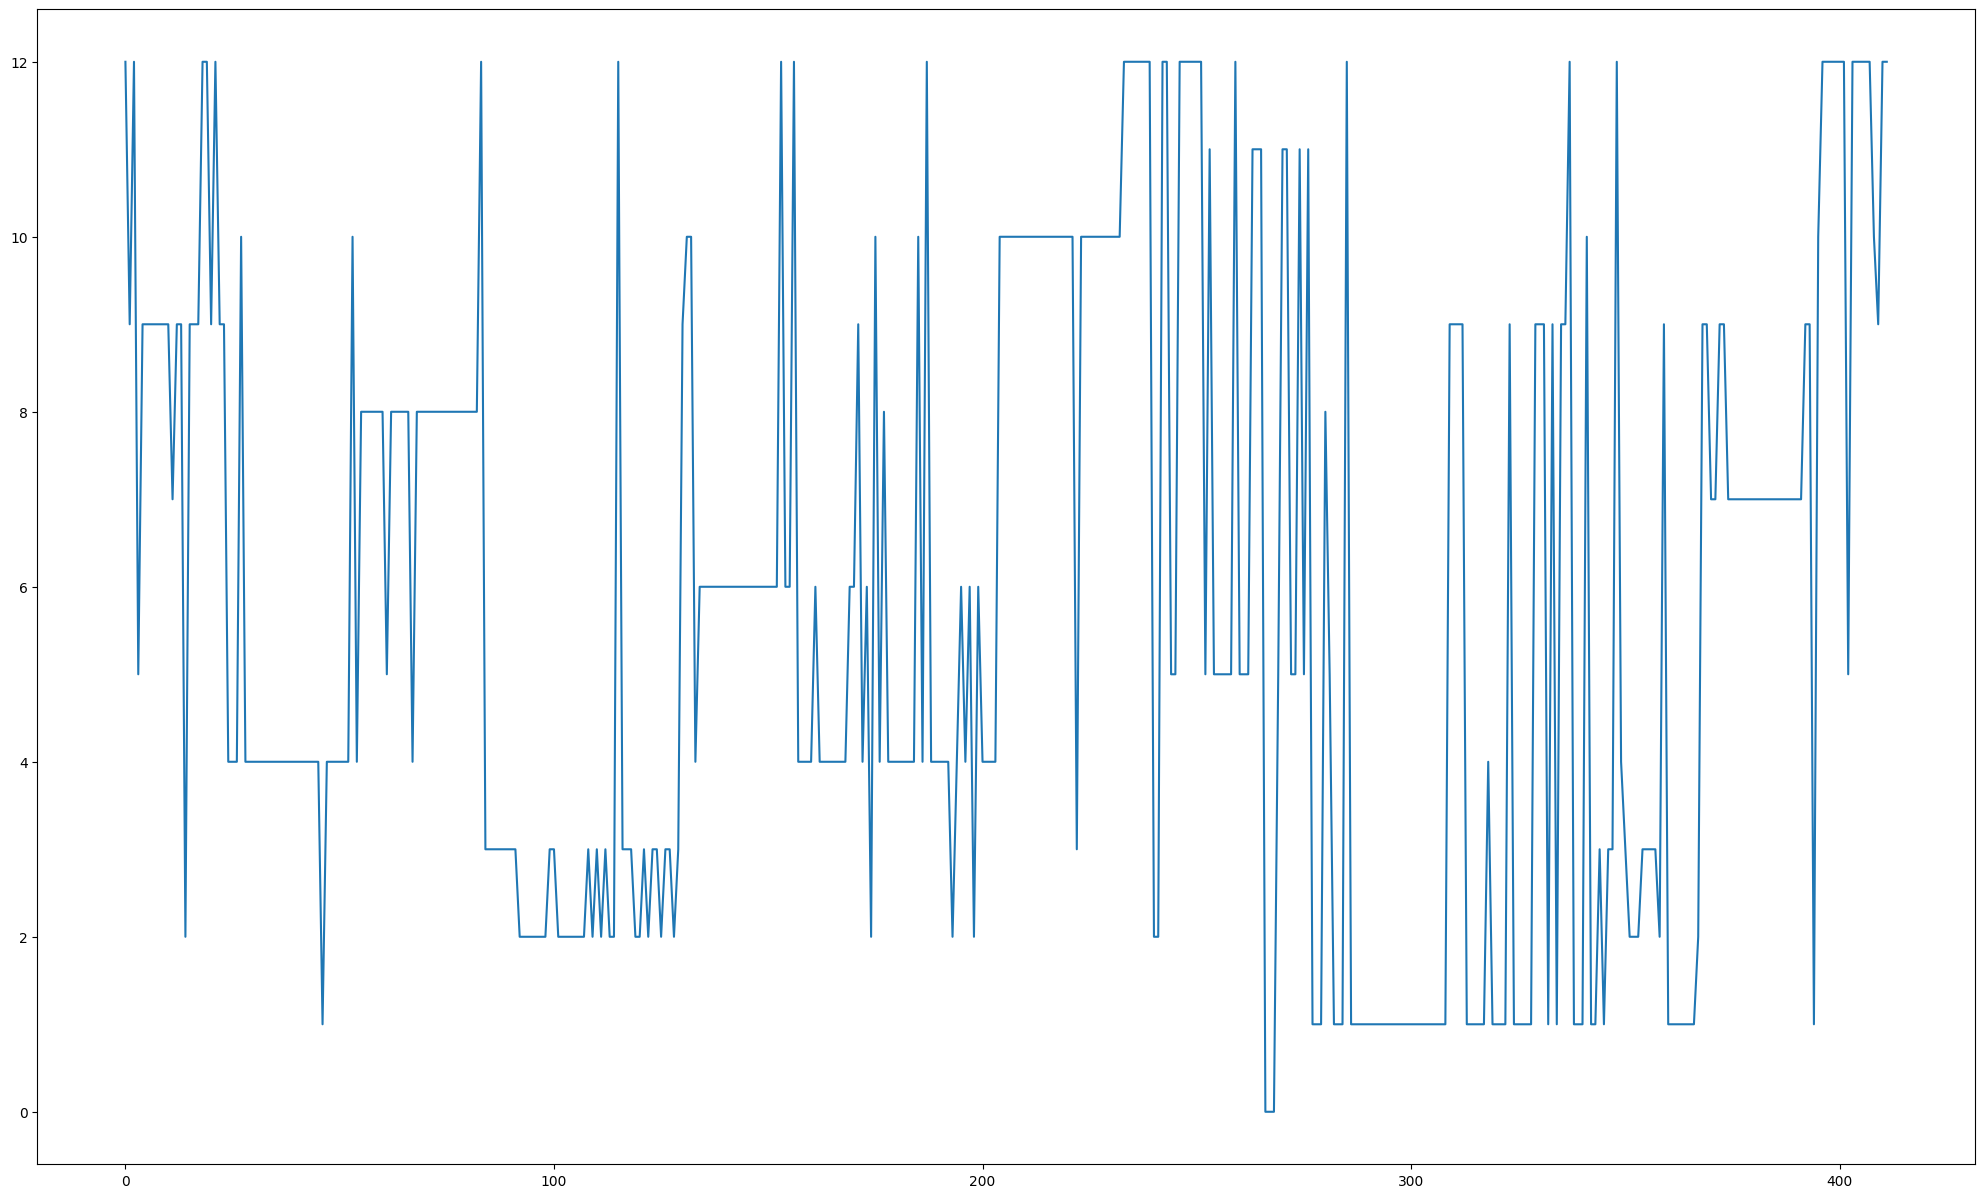

In [67]:
plt.figure(figsize=(25, 15))
plt.plot(list1,labels)